In [2]:
import pandas as pd,numpy as np
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data_5.csv')
df

,A1,A2,A3,A4,A5,max_def,FI
0,0.02,0.05,0.03,0.01,0.04,9.184899,0.872097
1,0.02,0.03,0.04,0.01,0.04,9.172794,0.873303
2,0.01,0.04,0.03,0.03,0.05,8.868641,0.909498
3,0.03,0.02,0.03,0.02,0.04,9.207077,0.873773
4,0.04,0.03,0.01,0.03,0.04,9.295652,0.872958
...,...,...,...,...,...,...,...
1994,0.02,0.05,0.01,0.04,0.02,9.519079,0.802979
1995,0.03,0.05,0.01,0.01,0.02,9.813405,0.792227
1996,0.05,0.02,0.03,0.03,0.05,8.929462,0.907664
1997,0.03,0.01,0.04,0.02,0.02,9.545090,0.848259


In [4]:
df=df.drop('FI',axis=1)
df

,A1,A2,A3,A4,A5,max_def
0,0.02,0.05,0.03,0.01,0.04,9.184899
1,0.02,0.03,0.04,0.01,0.04,9.172794
2,0.01,0.04,0.03,0.03,0.05,8.868641
3,0.03,0.02,0.03,0.02,0.04,9.207077
4,0.04,0.03,0.01,0.03,0.04,9.295652
...,...,...,...,...,...,...
1994,0.02,0.05,0.01,0.04,0.02,9.519079
1995,0.03,0.05,0.01,0.01,0.02,9.813405
1996,0.05,0.02,0.03,0.03,0.05,8.929462
1997,0.03,0.01,0.04,0.02,0.02,9.545090


In [5]:
df_train,df_test=train_test_split(df,train_size=0.1000500250125063,random_state=100)
df_train

,A1,A2,A3,A4,A5,max_def
862,0.03,0.05,0.02,0.05,0.02,9.291771
451,0.03,0.05,0.02,0.02,0.03,9.353947
34,0.03,0.05,0.05,0.05,0.03,8.751864
346,0.03,0.05,0.01,0.05,0.01,9.694838
1459,0.01,0.04,0.02,0.05,0.03,9.151663
...,...,...,...,...,...,...
1879,0.04,0.01,0.03,0.05,0.03,9.161666
1895,0.05,0.04,0.05,0.05,0.02,8.986637
1859,0.01,0.05,0.02,0.04,0.02,9.395405
792,0.02,0.01,0.02,0.04,0.04,9.205624


In [6]:
df_test=df_test[0:100]
df_test

,A1,A2,A3,A4,A5,max_def
1852,0.03,0.01,0.05,0.03,0.05,8.801769
1760,0.04,0.05,0.05,0.03,0.01,9.388246
268,0.03,0.05,0.03,0.01,0.03,9.350600
1998,0.04,0.05,0.01,0.04,0.02,9.497244
1396,0.05,0.01,0.01,0.02,0.03,9.676583
...,...,...,...,...,...,...
984,0.05,0.05,0.02,0.03,0.01,9.708108
1684,0.05,0.02,0.05,0.01,0.02,9.482454
225,0.05,0.03,0.03,0.05,0.01,9.513406
1424,0.03,0.02,0.02,0.01,0.03,9.619283


In [7]:
y_train=df_train.pop('max_def')
X_train=df_train
X_train

y_test=df_test.pop('max_def')
X_test=df_test
X_test

,A1,A2,A3,A4,A5
1852,0.03,0.01,0.05,0.03,0.05
1760,0.04,0.05,0.05,0.03,0.01
268,0.03,0.05,0.03,0.01,0.03
1998,0.04,0.05,0.01,0.04,0.02
1396,0.05,0.01,0.01,0.02,0.03
...,...,...,...,...,...
984,0.05,0.05,0.02,0.03,0.01
1684,0.05,0.02,0.05,0.01,0.02
225,0.05,0.03,0.03,0.05,0.01
1424,0.03,0.02,0.02,0.01,0.03


In [8]:
X_train

,A1,A2,A3,A4,A5
862,0.03,0.05,0.02,0.05,0.02
451,0.03,0.05,0.02,0.02,0.03
34,0.03,0.05,0.05,0.05,0.03
346,0.03,0.05,0.01,0.05,0.01
1459,0.01,0.04,0.02,0.05,0.03
...,...,...,...,...,...
1879,0.04,0.01,0.03,0.05,0.03
1895,0.05,0.04,0.05,0.05,0.02
1859,0.01,0.05,0.02,0.04,0.02
792,0.02,0.01,0.02,0.04,0.04


In [9]:
y_train

862      9.291771
451      9.353947
34       8.751864
346      9.694838
1459     9.151663
          ...    
1879     9.161666
1895     8.986637
1859     9.395405
792      9.205624
1544    10.063690
Name: max_def, Length: 200, dtype: float64

In [10]:
X_train.shape

(200, 5)

In [11]:
print(y_train.shape)

(200,)


In [12]:
type(y_train)

pandas.core.series.Series

In [13]:
import numpy as np
import pandas as pd
import pickle
import gzip
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model_max_def = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model_max_def.add(Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_max_def.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model_max_def.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model_max_def.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model_max_def.fit(X_train, y_train ,batch_size = 20, epochs = 2000, verbose=1)

Epoch 1/2000
10/10 [==============================] - 0s 886us/step - loss: 87.1268
Epoch 2/2000
10/10 [==============================] - 0s 776us/step - loss: 86.8817
Epoch 3/2000
10/10 [==============================] - 0s 774us/step - loss: 86.6070
Epoch 4/2000
10/10 [==============================] - 0s 886us/step - loss: 86.2931
Epoch 5/2000
10/10 [==============================] - 0s 775us/step - loss: 85.9298
Epoch 6/2000
10/10 [==============================] - 0s 778us/step - loss: 85.5066
Epoch 7/2000
10/10 [==============================] - 0s 776us/step - loss: 85.0136
Epoch 8/2000
10/10 [==============================] - 0s 887us/step - loss: 84.4412
Epoch 9/2000
10/10 [==============================] - 0s 663us/step - loss: 83.7814
Epoch 10/2000
10/10 [==============================] - 0s 776us/step - loss: 83.0255
Epoch 11/2000
10/10 [==============================] - 0s 665us/step - loss: 82.1667
Epoch 12/2000
10/10 [==============================] - 0s 887us/step - los

10/10 [==============================] - 0s 665us/step - loss: 0.3151
Epoch 194/2000
10/10 [==============================] - 0s 776us/step - loss: 0.3060
Epoch 195/2000
10/10 [==============================] - 0s 553us/step - loss: 0.2977
Epoch 196/2000
10/10 [==============================] - 0s 776us/step - loss: 0.2890
Epoch 197/2000
10/10 [==============================] - 0s 665us/step - loss: 0.2811
Epoch 198/2000
10/10 [==============================] - 0s 776us/step - loss: 0.2738
Epoch 199/2000
10/10 [==============================] - 0s 665us/step - loss: 0.2665
Epoch 200/2000
10/10 [==============================] - 0s 665us/step - loss: 0.2595
Epoch 201/2000
10/10 [==============================] - 0s 776us/step - loss: 0.2529
Epoch 202/2000
10/10 [==============================] - 0s 665us/step - loss: 0.2467
Epoch 203/2000
10/10 [==============================] - 0s 887us/step - loss: 0.2406
Epoch 204/2000
10/10 [==============================] - 0s 776us/step - loss: 0.

10/10 [==============================] - 0s 776us/step - loss: 0.1295
Epoch 386/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1296
Epoch 387/2000
10/10 [==============================] - 0s 887us/step - loss: 0.1295
Epoch 388/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1295
Epoch 389/2000
10/10 [==============================] - 0s 887us/step - loss: 0.1295
Epoch 390/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1296
Epoch 391/2000
10/10 [==============================] - 0s 886us/step - loss: 0.1295
Epoch 392/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1295
Epoch 393/2000
10/10 [==============================] - 0s 887us/step - loss: 0.1295
Epoch 394/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1295
Epoch 395/2000
10/10 [==============================] - 0s 887us/step - loss: 0.1295
Epoch 396/2000
10/10 [==============================] - 0s 664us/step - loss: 0.

10/10 [==============================] - 0s 776us/step - loss: 0.1290
Epoch 578/2000
10/10 [==============================] - 0s 886us/step - loss: 0.1290
Epoch 579/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1290
Epoch 580/2000
10/10 [==============================] - 0s 997us/step - loss: 0.1291
Epoch 581/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1290
Epoch 582/2000
10/10 [==============================] - 0s 886us/step - loss: 0.1290
Epoch 583/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1290
Epoch 584/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1290
Epoch 585/2000
10/10 [==============================] - 0s 887us/step - loss: 0.1290
Epoch 586/2000
10/10 [==============================] - 0s 886us/step - loss: 0.1290
Epoch 587/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1290
Epoch 588/2000
10/10 [==============================] - 0s 665us/step - loss: 0.

10/10 [==============================] - 0s 776us/step - loss: 0.1283
Epoch 770/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1283
Epoch 771/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1283
Epoch 772/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1283
Epoch 773/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1283
Epoch 774/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1286
Epoch 775/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1282
Epoch 776/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1282
Epoch 777/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1283
Epoch 778/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1283
Epoch 779/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1282
Epoch 780/2000
10/10 [==============================] - 0s 776us/step - loss: 0.

10/10 [==============================] - 0s 776us/step - loss: 0.1275
Epoch 962/2000
10/10 [==============================] - 0s 775us/step - loss: 0.1275
Epoch 963/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1275
Epoch 964/2000
10/10 [==============================] - 0s 887us/step - loss: 0.1278
Epoch 965/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1276
Epoch 966/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1275
Epoch 967/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1275
Epoch 968/2000
10/10 [==============================] - 0s 887us/step - loss: 0.1275
Epoch 969/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1276
Epoch 970/2000
10/10 [==============================] - 0s 997us/step - loss: 0.1275
Epoch 971/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1275
Epoch 972/2000
10/10 [==============================] - 0s 1000us/step - loss: 0

10/10 [==============================] - 0s 887us/step - loss: 0.1270
Epoch 1152/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1271
Epoch 1153/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1270
Epoch 1154/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1271
Epoch 1155/2000
10/10 [==============================] - 0s 886us/step - loss: 0.1271
Epoch 1156/2000
10/10 [==============================] - 0s 554us/step - loss: 0.1272
Epoch 1157/2000
10/10 [==============================] - 0s 886us/step - loss: 0.1270
Epoch 1158/2000
10/10 [==============================] - 0s 664us/step - loss: 0.1270
Epoch 1159/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1271
Epoch 1160/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1270
Epoch 1161/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1272
Epoch 1162/2000
10/10 [==============================] - 0s 776us/step

10/10 [==============================] - 0s 776us/step - loss: 0.1269
Epoch 1342/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.1269
Epoch 1343/2000
10/10 [==============================] - 0s 887us/step - loss: 0.1268
Epoch 1344/2000
10/10 [==============================] - 0s 886us/step - loss: 0.1269
Epoch 1345/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1269
Epoch 1346/2000
10/10 [==============================] - 0s 887us/step - loss: 0.1269
Epoch 1347/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1269
Epoch 1348/2000
10/10 [==============================] - 0s 886us/step - loss: 0.1272
Epoch 1349/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1268
Epoch 1350/2000
10/10 [==============================] - 0s 887us/step - loss: 0.1272
Epoch 1351/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1269
Epoch 1352/2000
10/10 [==============================] - 0s 776us/step -

10/10 [==============================] - 0s 665us/step - loss: 0.1267
Epoch 1532/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1268
Epoch 1533/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1267
Epoch 1534/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1267
Epoch 1535/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1267
Epoch 1536/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1266
Epoch 1537/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1268
Epoch 1538/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1266
Epoch 1539/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1266
Epoch 1540/2000
10/10 [==============================] - 0s 665us/step - loss: 0.1267
Epoch 1541/2000
10/10 [==============================] - 0s 776us/step - loss: 0.1266
Epoch 1542/2000
10/10 [==============================] - 0s 665us/step

10/10 [==============================] - 0s 665us/step - loss: 0.0052
Epoch 1722/2000
10/10 [==============================] - 0s 773us/step - loss: 0.0052
Epoch 1723/2000
10/10 [==============================] - 0s 776us/step - loss: 0.0051
Epoch 1724/2000
10/10 [==============================] - 0s 665us/step - loss: 0.0052
Epoch 1725/2000
10/10 [==============================] - 0s 776us/step - loss: 0.0051
Epoch 1726/2000
10/10 [==============================] - 0s 665us/step - loss: 0.0051
Epoch 1727/2000
10/10 [==============================] - 0s 776us/step - loss: 0.0052
Epoch 1728/2000
10/10 [==============================] - 0s 665us/step - loss: 0.0051
Epoch 1729/2000
10/10 [==============================] - 0s 774us/step - loss: 0.0051
Epoch 1730/2000
10/10 [==============================] - 0s 776us/step - loss: 0.0051
Epoch 1731/2000
10/10 [==============================] - 0s 776us/step - loss: 0.0051
Epoch 1732/2000
10/10 [==============================] - 0s 665us/step

10/10 [==============================] - 0s 665us/step - loss: 0.0042
Epoch 1912/2000
10/10 [==============================] - 0s 776us/step - loss: 0.0042
Epoch 1913/2000
10/10 [==============================] - 0s 776us/step - loss: 0.0042
Epoch 1914/2000
10/10 [==============================] - 0s 886us/step - loss: 0.0040
Epoch 1915/2000
10/10 [==============================] - 0s 665us/step - loss: 0.0042
Epoch 1916/2000
10/10 [==============================] - 0s 776us/step - loss: 0.0042
Epoch 1917/2000
10/10 [==============================] - 0s 665us/step - loss: 0.0042
Epoch 1918/2000
10/10 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 1919/2000
10/10 [==============================] - 0s 886us/step - loss: 0.0041
Epoch 1920/2000
10/10 [==============================] - 0s 997us/step - loss: 0.0041
Epoch 1921/2000
10/10 [==============================] - 0s 776us/step - loss: 0.0041
Epoch 1922/2000
10/10 [==============================] - 0s 997us/step -

In [15]:
scores_train = model_max_def.evaluate(X_train,y_train)

7/7 [==============================] - 0s 665us/step - loss: 0.0038


In [16]:
y_test_predi = model_max_def.predict(X_test)

In [17]:
float(model_max_def.predict(pd.DataFrame([0.03,0.01,0.05,0.03,0.05]).T))

8.722297668457031

In [18]:
y_test_pred=[]
for x in y_test_predi:
    y_test_pred.append(x[0])
y_test_pred

[8.722299,
 9.369735,
 9.409705,
 9.524631,
 9.686971,
 9.663623,
 9.546997,
 9.480157,
 8.845404,
 8.656589,
 9.913062,
 9.780643,
 9.544456,
 9.56227,
 9.018673,
 9.192888,
 9.145497,
 9.88038,
 9.044848,
 9.511311,
 9.161288,
 9.841157,
 8.94242,
 9.681846,
 9.374123,
 9.049706,
 9.067376,
 9.366446,
 9.65115,
 9.196896,
 9.449723,
 9.657635,
 8.599965,
 9.128173,
 9.668022,
 9.689621,
 8.915072,
 9.638249,
 9.295333,
 8.933224,
 9.317611,
 9.689421,
 9.203228,
 9.320977,
 9.286293,
 9.119769,
 9.224747,
 9.533347,
 9.573374,
 8.792874,
 9.481714,
 9.075894,
 9.547409,
 9.832437,
 9.5030575,
 9.109099,
 9.733384,
 8.95685,
 9.0665655,
 9.039349,
 8.534531,
 9.51657,
 9.519969,
 9.643261,
 8.792281,
 9.016708,
 9.803402,
 9.021251,
 8.833544,
 8.942248,
 8.852571,
 9.531582,
 9.652553,
 9.603191,
 9.103755,
 9.846591,
 9.685546,
 9.223041,
 9.34968,
 9.516441,
 9.455076,
 9.234848,
 9.632041,
 9.79191,
 9.47801,
 9.064643,
 9.286769,
 9.143215,
 9.495397,
 8.96101,
 9.090584,
 9.7790

In [19]:
scores_test = model_max_def.evaluate(X_test, y_test)
scores_test

4/4 [==============================] - 0s 665us/step - loss: 0.0027


0.00265423022210598

In [20]:
y_test

1852    8.801769
1760    9.388246
268     9.350600
1998    9.497244
1396    9.676583
          ...   
984     9.708108
1684    9.482454
225     9.513406
1424    9.619283
1887    9.484906
Name: max_def, Length: 100, dtype: float64

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(list(y_test),y_test_pred)

0.9780971765556767

In [23]:
y_train_predi = model_max_def.predict(X_train)

In [24]:
y_train_pred=[]
for x in y_train_predi:
    y_train_pred.append(x[0])
y_train_pred

[9.332194,
 9.426106,
 8.716855,
 9.615846,
 9.198704,
 9.18265,
 8.9949255,
 8.933784,
 9.689682,
 8.407738,
 9.010223,
 9.51615,
 9.1033945,
 9.112655,
 9.529431,
 9.685285,
 8.576062,
 9.52026,
 8.520995,
 9.322647,
 9.165894,
 9.636779,
 9.821611,
 9.481417,
 8.38226,
 9.395029,
 9.384402,
 9.13646,
 9.5605345,
 9.569612,
 9.12896,
 9.608909,
 9.75434,
 9.488914,
 9.414308,
 8.954664,
 9.839648,
 8.656779,
 9.153449,
 9.484632,
 8.719155,
 9.709364,
 9.319457,
 8.763432,
 9.163984,
 9.545087,
 9.566963,
 9.814482,
 9.609459,
 9.625993,
 9.736451,
 9.868248,
 9.2687025,
 9.504206,
 8.763933,
 8.972396,
 9.601533,
 9.234589,
 9.527917,
 9.458899,
 9.586416,
 9.111777,
 9.65282,
 9.475081,
 9.439038,
 9.709931,
 8.82127,
 8.795521,
 9.378872,
 9.45732,
 9.703557,
 9.414073,
 9.784512,
 9.721552,
 9.373983,
 9.28637,
 9.337684,
 9.748662,
 8.590128,
 9.101344,
 9.502539,
 9.118335,
 9.229554,
 9.07598,
 9.460335,
 9.538698,
 9.441071,
 9.502607,
 9.246714,
 9.681962,
 9.447833,
 9.2694

In [25]:
r2_score(y_train,y_train_pred)

0.9698279476376538

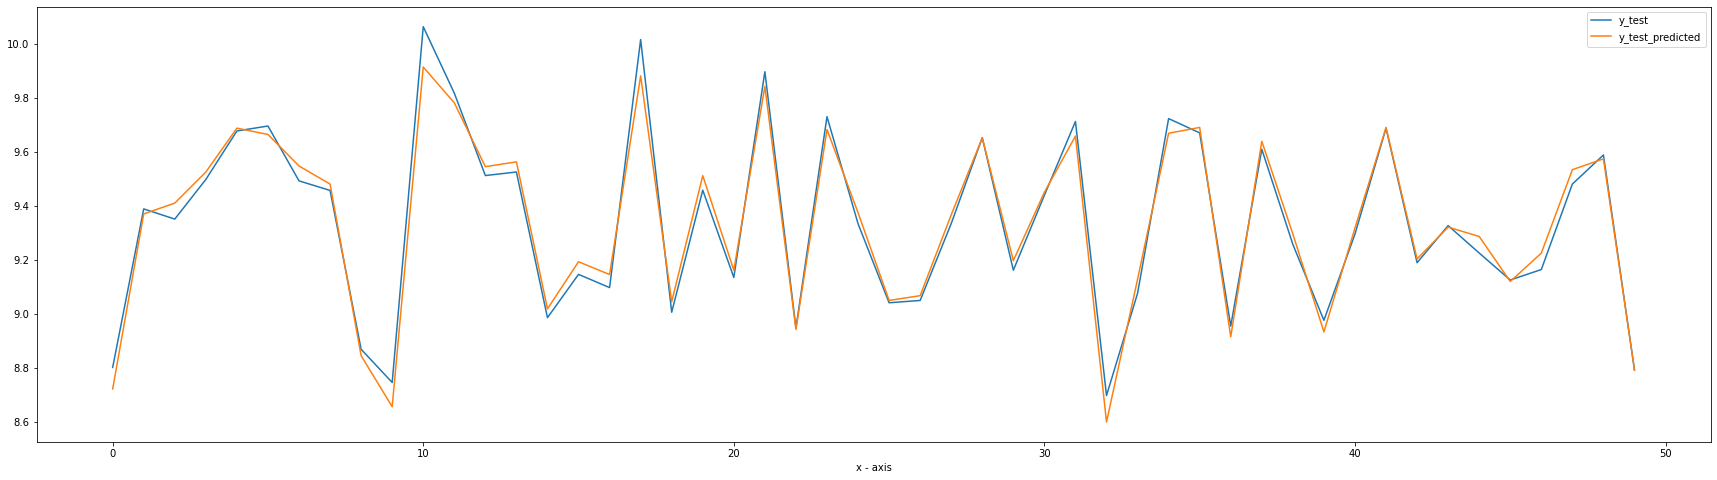

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=[30,8])
x1 = list(range(50))
y1 = list(y_test)[0:50]
plt.plot(x1, y1, label = "y_test")
x2 = list(range(50))
y2 = y_test_pred[0:50]
plt.plot(x2, y2, label = "y_test_predicted")
plt.xlabel('x - axis')
plt.legend()
plt.show()
plt.savefig('test.png')

<AxesSubplot:>

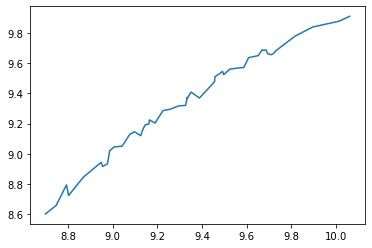

In [27]:
sns.lineplot(x=list(y_test)[0:50],y=y_test_pred[0:50])

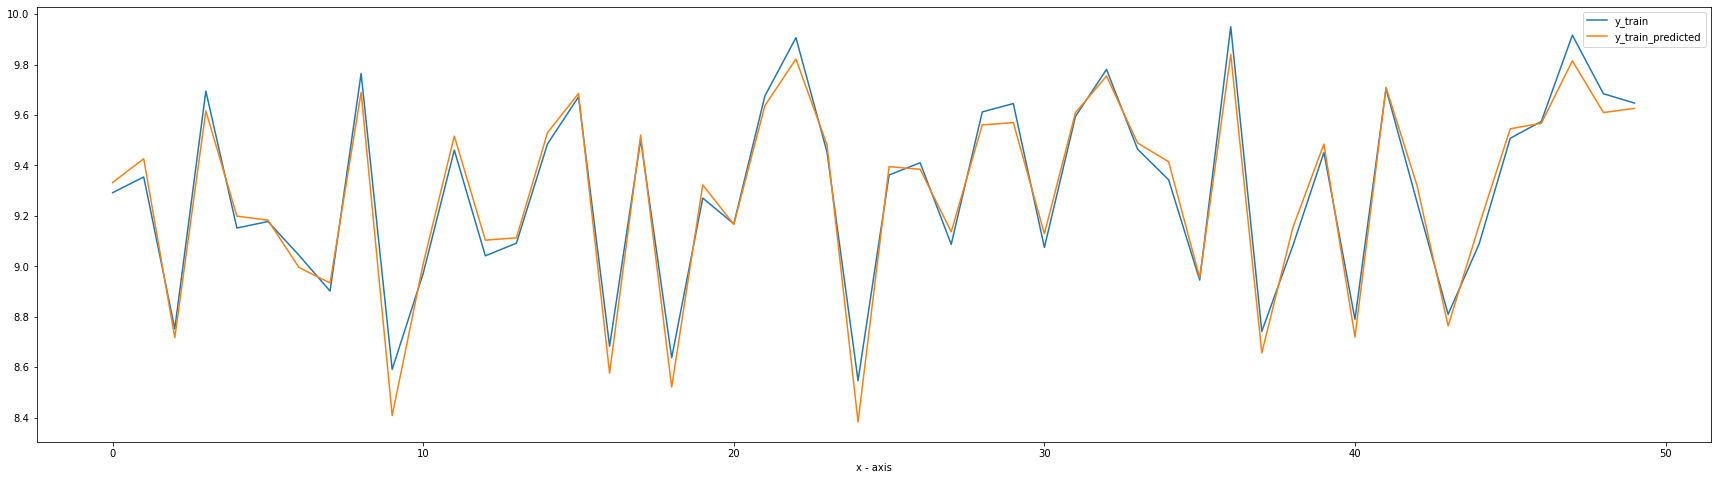

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=[30,8])
x1 = list(range(50))
y1 = list(y_train)[0:50]
plt.plot(x1, y1, label = "y_train")
x2 = list(range(50))
y2 = y_train_pred[0:50]
plt.plot(x2, y2, label = "y_train_predicted")
plt.xlabel('x - axis')
plt.legend()
plt.show()
plt.savefig('train.png')

In [29]:
df=pd.read_csv('DATA_CLASSIFICATION.csv')
df

,A1,A2,A3,A4,A5,FI,FAIL
0,0.02,0.05,0.03,0.01,0.04,0.872097,0
1,0.02,0.03,0.04,0.01,0.04,0.873303,0
2,0.01,0.04,0.03,0.03,0.05,0.909498,1
3,0.03,0.02,0.03,0.02,0.04,0.873773,0
4,0.04,0.03,0.01,0.03,0.04,0.872958,0
...,...,...,...,...,...,...,...
1994,0.02,0.05,0.01,0.04,0.02,0.802979,0
1995,0.03,0.05,0.01,0.01,0.02,0.792227,0
1996,0.05,0.02,0.03,0.03,0.05,0.907664,1
1997,0.03,0.01,0.04,0.02,0.02,0.848259,0


In [30]:
df=df.drop('FI',axis=1)
df

,A1,A2,A3,A4,A5,FAIL
0,0.02,0.05,0.03,0.01,0.04,0
1,0.02,0.03,0.04,0.01,0.04,0
2,0.01,0.04,0.03,0.03,0.05,1
3,0.03,0.02,0.03,0.02,0.04,0
4,0.04,0.03,0.01,0.03,0.04,0
...,...,...,...,...,...,...
1994,0.02,0.05,0.01,0.04,0.02,0
1995,0.03,0.05,0.01,0.01,0.02,0
1996,0.05,0.02,0.03,0.03,0.05,1
1997,0.03,0.01,0.04,0.02,0.02,0


In [31]:
df_train,df_test=train_test_split(df,train_size=0.1000500250125063,random_state=100)
df_train

,A1,A2,A3,A4,A5,FAIL
862,0.03,0.05,0.02,0.05,0.02,0
451,0.03,0.05,0.02,0.02,0.03,0
34,0.03,0.05,0.05,0.05,0.03,1
346,0.03,0.05,0.01,0.05,0.01,0
1459,0.01,0.04,0.02,0.05,0.03,0
...,...,...,...,...,...,...
1879,0.04,0.01,0.03,0.05,0.03,0
1895,0.05,0.04,0.05,0.05,0.02,1
1859,0.01,0.05,0.02,0.04,0.02,0
792,0.02,0.01,0.02,0.04,0.04,0


In [32]:
df_train['FAIL'].sum()

70

In [33]:
df_test=df_test[0:100]
df_test

,A1,A2,A3,A4,A5,FAIL
1852,0.03,0.01,0.05,0.03,0.05,1
1760,0.04,0.05,0.05,0.03,0.01,1
268,0.03,0.05,0.03,0.01,0.03,0
1998,0.04,0.05,0.01,0.04,0.02,0
1396,0.05,0.01,0.01,0.02,0.03,0
...,...,...,...,...,...,...
984,0.05,0.05,0.02,0.03,0.01,0
1684,0.05,0.02,0.05,0.01,0.02,1
225,0.05,0.03,0.03,0.05,0.01,0
1424,0.03,0.02,0.02,0.01,0.03,0


In [34]:
df_test['FAIL'].sum()

35

In [35]:
y_train=df_train.pop('FAIL')
X_train=df_train
X_train

y_test=df_test.pop('FAIL')
X_test=df_test
X_test

,A1,A2,A3,A4,A5
1852,0.03,0.01,0.05,0.03,0.05
1760,0.04,0.05,0.05,0.03,0.01
268,0.03,0.05,0.03,0.01,0.03
1998,0.04,0.05,0.01,0.04,0.02
1396,0.05,0.01,0.01,0.02,0.03
...,...,...,...,...,...
984,0.05,0.05,0.02,0.03,0.01
1684,0.05,0.02,0.05,0.01,0.02
225,0.05,0.03,0.03,0.05,0.01
1424,0.03,0.02,0.02,0.01,0.03


In [36]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model_failure = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model_failure.add(Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_failure.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model_failure.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

# Compiling the model
model_failure.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

# Fitting the ANN to the Training set
model_failure.fit(X_train, y_train ,batch_size = 20, epochs = 2000, verbose=1,validation_data=(X_test,y_test))

Epoch 1/2000
10/10 [==============================] - 0s 11ms/step - loss: 0.6924 - accuracy: 0.6500 - val_loss: 0.6917 - val_accuracy: 0.6500
Epoch 2/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.6500 - val_loss: 0.6901 - val_accuracy: 0.6500
Epoch 3/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.6500 - val_loss: 0.6883 - val_accuracy: 0.6500
Epoch 4/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.6500 - val_loss: 0.6862 - val_accuracy: 0.6500
Epoch 5/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.6500 - val_loss: 0.6841 - val_accuracy: 0.6500
Epoch 6/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.6500 - val_loss: 0.6817 - val_accuracy: 0.6500
Epoch 7/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.6500 - val_loss: 0.6789 - val_accuracy: 0.6500
Epoch

10/10 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.6500 - val_loss: 0.6304 - val_accuracy: 0.6500
Epoch 116/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.6283 - accuracy: 0.6500 - val_loss: 0.6298 - val_accuracy: 0.6500
Epoch 117/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.6500 - val_loss: 0.6292 - val_accuracy: 0.6500
Epoch 118/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6500 - val_loss: 0.6286 - val_accuracy: 0.6500
Epoch 119/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.6500 - val_loss: 0.6280 - val_accuracy: 0.6500
Epoch 120/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.6500 - val_loss: 0.6274 - val_accuracy: 0.6500
Epoch 121/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.6500 - val_loss: 0.6267 - val_accuracy: 0.6500
Epoch 1

Epoch 172/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.5384 - accuracy: 0.6500 - val_loss: 0.5468 - val_accuracy: 0.6500
Epoch 173/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.6500 - val_loss: 0.5443 - val_accuracy: 0.6500
Epoch 174/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.6500 - val_loss: 0.5419 - val_accuracy: 0.6500
Epoch 175/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.5302 - accuracy: 0.6750 - val_loss: 0.5394 - val_accuracy: 0.7200
Epoch 176/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7050 - val_loss: 0.5370 - val_accuracy: 0.7300
Epoch 177/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7150 - val_loss: 0.5341 - val_accuracy: 0.7200
Epoch 178/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.5211 - accuracy: 0.7150 - val_loss: 0.5312 - val_accuracy:

Epoch 229/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8500 - val_loss: 0.4158 - val_accuracy: 0.8300
Epoch 230/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8500 - val_loss: 0.4141 - val_accuracy: 0.8300
Epoch 231/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8500 - val_loss: 0.4129 - val_accuracy: 0.8300
Epoch 232/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3831 - accuracy: 0.8550 - val_loss: 0.4118 - val_accuracy: 0.8300
Epoch 233/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.8500 - val_loss: 0.4101 - val_accuracy: 0.8300
Epoch 234/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3805 - accuracy: 0.8500 - val_loss: 0.4089 - val_accuracy: 0.8300
Epoch 235/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8550 - val_loss: 0.4083 - val_accuracy:

Epoch 286/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8300 - val_loss: 0.3765 - val_accuracy: 0.8300
Epoch 287/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8400 - val_loss: 0.3754 - val_accuracy: 0.8400
Epoch 288/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3359 - accuracy: 0.8250 - val_loss: 0.3765 - val_accuracy: 0.8300
Epoch 289/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.8350 - val_loss: 0.3749 - val_accuracy: 0.8400
Epoch 290/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3334 - accuracy: 0.8400 - val_loss: 0.3747 - val_accuracy: 0.8400
Epoch 291/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.8150 - val_loss: 0.3758 - val_accuracy: 0.8300
Epoch 292/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3326 - accuracy: 0.8250 - val_loss: 0.3741 - val_accuracy:

Epoch 343/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3215 - accuracy: 0.8350 - val_loss: 0.3694 - val_accuracy: 0.8300
Epoch 344/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.8250 - val_loss: 0.3690 - val_accuracy: 0.8300
Epoch 345/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.8350 - val_loss: 0.3685 - val_accuracy: 0.8400
Epoch 346/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.8350 - val_loss: 0.3688 - val_accuracy: 0.8300
Epoch 347/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3206 - accuracy: 0.8400 - val_loss: 0.3686 - val_accuracy: 0.8300
Epoch 348/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3220 - accuracy: 0.8300 - val_loss: 0.3684 - val_accuracy: 0.8500
Epoch 349/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3218 - accuracy: 0.8350 - val_loss: 0.3689 - val_accuracy:

Epoch 400/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3185 - accuracy: 0.8350 - val_loss: 0.3684 - val_accuracy: 0.8300
Epoch 401/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.8400 - val_loss: 0.3677 - val_accuracy: 0.8400
Epoch 402/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8300 - val_loss: 0.3676 - val_accuracy: 0.8400
Epoch 403/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8300 - val_loss: 0.3678 - val_accuracy: 0.8400
Epoch 404/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3173 - accuracy: 0.8350 - val_loss: 0.3682 - val_accuracy: 0.8300
Epoch 405/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.8400 - val_loss: 0.3677 - val_accuracy: 0.8400
Epoch 406/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8350 - val_loss: 0.3680 - val_accuracy:

Epoch 457/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.8350 - val_loss: 0.3684 - val_accuracy: 0.8300
Epoch 458/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.8350 - val_loss: 0.3676 - val_accuracy: 0.8400
Epoch 459/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.8300 - val_loss: 0.3676 - val_accuracy: 0.8400
Epoch 460/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8250 - val_loss: 0.3678 - val_accuracy: 0.8400
Epoch 461/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3157 - accuracy: 0.8350 - val_loss: 0.3680 - val_accuracy: 0.8400
Epoch 462/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.8300 - val_loss: 0.3675 - val_accuracy: 0.8400
Epoch 463/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.8300 - val_loss: 0.3675 - val_accuracy:

Epoch 514/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.8350 - val_loss: 0.3678 - val_accuracy: 0.8400
Epoch 515/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.8300 - val_loss: 0.3673 - val_accuracy: 0.8500
Epoch 516/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3157 - accuracy: 0.8350 - val_loss: 0.3675 - val_accuracy: 0.8400
Epoch 517/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3157 - accuracy: 0.8200 - val_loss: 0.3673 - val_accuracy: 0.8400
Epoch 518/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3154 - accuracy: 0.8300 - val_loss: 0.3674 - val_accuracy: 0.8400
Epoch 519/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3155 - accuracy: 0.8250 - val_loss: 0.3672 - val_accuracy: 0.8500
Epoch 520/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.8250 - val_loss: 0.3678 - val_accuracy:

Epoch 571/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.8250 - val_loss: 0.3700 - val_accuracy: 0.8200
Epoch 572/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8200 - val_loss: 0.3671 - val_accuracy: 0.8400
Epoch 573/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.8300 - val_loss: 0.3672 - val_accuracy: 0.8400
Epoch 574/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3151 - accuracy: 0.8300 - val_loss: 0.3670 - val_accuracy: 0.8400
Epoch 575/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3147 - accuracy: 0.8300 - val_loss: 0.3675 - val_accuracy: 0.8300
Epoch 576/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.3153 - accuracy: 0.8250 - val_loss: 0.3674 - val_accuracy: 0.8300
Epoch 577/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.3147 - accuracy: 0.8300 - val_loss: 0.3673 - val_accuracy:

Epoch 628/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8200 - val_loss: 0.3669 - val_accuracy: 0.8400
Epoch 629/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.8200 - val_loss: 0.3666 - val_accuracy: 0.8500
Epoch 630/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8250 - val_loss: 0.3669 - val_accuracy: 0.8400
Epoch 631/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.8250 - val_loss: 0.3676 - val_accuracy: 0.8300
Epoch 632/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8200 - val_loss: 0.3671 - val_accuracy: 0.8300
Epoch 633/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8300 - val_loss: 0.3667 - val_accuracy: 0.8400
Epoch 634/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.8250 - val_loss: 0.3667 - val_accuracy:

Epoch 685/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.8200 - val_loss: 0.3664 - val_accuracy: 0.8500
Epoch 686/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.8250 - val_loss: 0.3666 - val_accuracy: 0.8400
Epoch 687/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8250 - val_loss: 0.3668 - val_accuracy: 0.8300
Epoch 688/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8200 - val_loss: 0.3666 - val_accuracy: 0.8300
Epoch 689/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8250 - val_loss: 0.3665 - val_accuracy: 0.8400
Epoch 690/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8250 - val_loss: 0.3664 - val_accuracy: 0.8500
Epoch 691/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8250 - val_loss: 0.3664 - val_accuracy:

Epoch 742/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.8250 - val_loss: 0.3661 - val_accuracy: 0.8500
Epoch 743/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.8300 - val_loss: 0.3663 - val_accuracy: 0.8300
Epoch 744/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8200 - val_loss: 0.3665 - val_accuracy: 0.8300
Epoch 745/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.8300 - val_loss: 0.3661 - val_accuracy: 0.8500
Epoch 746/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8250 - val_loss: 0.3661 - val_accuracy: 0.8400
Epoch 747/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.8250 - val_loss: 0.3671 - val_accuracy: 0.8300
Epoch 748/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.8250 - val_loss: 0.3664 - val_accuracy:

Epoch 799/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8250 - val_loss: 0.3668 - val_accuracy: 0.8300
Epoch 800/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.8250 - val_loss: 0.3672 - val_accuracy: 0.8300
Epoch 801/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3140 - accuracy: 0.8150 - val_loss: 0.3662 - val_accuracy: 0.8300
Epoch 802/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.8300 - val_loss: 0.3659 - val_accuracy: 0.8500
Epoch 803/2000
10/10 [==============================] - 0s 6ms/step - loss: 0.3143 - accuracy: 0.8300 - val_loss: 0.3659 - val_accuracy: 0.8500
Epoch 804/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.8200 - val_loss: 0.3671 - val_accuracy: 0.8300
Epoch 805/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3220 - accuracy: 0.8200 - val_loss: 0.3660 - val_accuracy:

Epoch 856/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8250 - val_loss: 0.3659 - val_accuracy: 0.8300
Epoch 857/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8200 - val_loss: 0.3658 - val_accuracy: 0.8400
Epoch 858/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8150 - val_loss: 0.3665 - val_accuracy: 0.8300
Epoch 859/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3143 - accuracy: 0.8200 - val_loss: 0.3661 - val_accuracy: 0.8300
Epoch 860/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8300 - val_loss: 0.3658 - val_accuracy: 0.8500
Epoch 861/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8250 - val_loss: 0.3658 - val_accuracy: 0.8400
Epoch 862/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8200 - val_loss: 0.3661 - val_accuracy:

Epoch 913/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8200 - val_loss: 0.3659 - val_accuracy: 0.8300
Epoch 914/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8300 - val_loss: 0.3657 - val_accuracy: 0.8400
Epoch 915/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.8200 - val_loss: 0.3659 - val_accuracy: 0.8300
Epoch 916/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8250 - val_loss: 0.3657 - val_accuracy: 0.8500
Epoch 917/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8250 - val_loss: 0.3658 - val_accuracy: 0.8300
Epoch 918/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8300 - val_loss: 0.3657 - val_accuracy: 0.8400
Epoch 919/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8200 - val_loss: 0.3659 - val_accuracy:

Epoch 970/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8200 - val_loss: 0.3655 - val_accuracy: 0.8500
Epoch 971/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.8200 - val_loss: 0.3656 - val_accuracy: 0.8300
Epoch 972/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8300 - val_loss: 0.3655 - val_accuracy: 0.8300
Epoch 973/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8250 - val_loss: 0.3657 - val_accuracy: 0.8300
Epoch 974/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8250 - val_loss: 0.3655 - val_accuracy: 0.8500
Epoch 975/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8250 - val_loss: 0.3659 - val_accuracy: 0.8300
Epoch 976/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8200 - val_loss: 0.3660 - val_accuracy:

Epoch 1027/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.3144 - accuracy: 0.8150 - val_loss: 0.3667 - val_accuracy: 0.8300
Epoch 1028/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8200 - val_loss: 0.3658 - val_accuracy: 0.8300
Epoch 1029/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8300 - val_loss: 0.3655 - val_accuracy: 0.8500
Epoch 1030/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8300 - val_loss: 0.3655 - val_accuracy: 0.8400
Epoch 1031/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8300 - val_loss: 0.3657 - val_accuracy: 0.8300
Epoch 1032/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8200 - val_loss: 0.3661 - val_accuracy: 0.8300
Epoch 1033/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.8200 - val_loss: 0.3667 - val_ac

10/10 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8150 - val_loss: 0.3660 - val_accuracy: 0.8300
Epoch 1140/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8300 - val_loss: 0.3654 - val_accuracy: 0.8300
Epoch 1141/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8250 - val_loss: 0.3655 - val_accuracy: 0.8300
Epoch 1142/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.8150 - val_loss: 0.3661 - val_accuracy: 0.8300
Epoch 1143/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8150 - val_loss: 0.3659 - val_accuracy: 0.8300
Epoch 1144/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8150 - val_loss: 0.3654 - val_accuracy: 0.8400
Epoch 1145/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8250 - val_loss: 0.3656 - val_accuracy: 0.8300
E

10/10 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8200 - val_loss: 0.3660 - val_accuracy: 0.8300
Epoch 1252/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.8250 - val_loss: 0.3653 - val_accuracy: 0.8500
Epoch 1253/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8200 - val_loss: 0.3655 - val_accuracy: 0.8300
Epoch 1254/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8200 - val_loss: 0.3657 - val_accuracy: 0.8300
Epoch 1255/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8250 - val_loss: 0.3652 - val_accuracy: 0.8400
Epoch 1256/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8300 - val_loss: 0.3652 - val_accuracy: 0.8500
Epoch 1257/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8200 - val_loss: 0.3661 - val_accuracy: 0.8300
E

10/10 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8250 - val_loss: 0.3652 - val_accuracy: 0.8500
Epoch 1364/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8300 - val_loss: 0.3652 - val_accuracy: 0.8500
Epoch 1365/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8200 - val_loss: 0.3655 - val_accuracy: 0.8300
Epoch 1366/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8250 - val_loss: 0.3652 - val_accuracy: 0.8300
Epoch 1367/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.8150 - val_loss: 0.3659 - val_accuracy: 0.8300
Epoch 1368/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8250 - val_loss: 0.3652 - val_accuracy: 0.8300
Epoch 1369/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8350 - val_loss: 0.3652 - val_accuracy: 0.8400
E

10/10 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8200 - val_loss: 0.3652 - val_accuracy: 0.8500
Epoch 1476/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8300 - val_loss: 0.3654 - val_accuracy: 0.8300
Epoch 1477/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8200 - val_loss: 0.3658 - val_accuracy: 0.8300
Epoch 1478/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8150 - val_loss: 0.3654 - val_accuracy: 0.8300
Epoch 1479/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8200 - val_loss: 0.3653 - val_accuracy: 0.8300
Epoch 1480/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8200 - val_loss: 0.3653 - val_accuracy: 0.8300
Epoch 1481/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8300 - val_loss: 0.3652 - val_accuracy: 0.8400
E

10/10 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8300 - val_loss: 0.3651 - val_accuracy: 0.8500
Epoch 1588/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8200 - val_loss: 0.3658 - val_accuracy: 0.8300
Epoch 1589/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8300 - val_loss: 0.3651 - val_accuracy: 0.8500
Epoch 1590/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8200 - val_loss: 0.3653 - val_accuracy: 0.8300
Epoch 1591/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8200 - val_loss: 0.3652 - val_accuracy: 0.8300
Epoch 1592/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3132 - accuracy: 0.8300 - val_loss: 0.3653 - val_accuracy: 0.8300
Epoch 1593/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.8150 - val_loss: 0.3661 - val_accuracy: 0.8300
E

10/10 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8300 - val_loss: 0.3651 - val_accuracy: 0.8500
Epoch 1700/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.8300 - val_loss: 0.3654 - val_accuracy: 0.8300
Epoch 1701/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8200 - val_loss: 0.3653 - val_accuracy: 0.8300
Epoch 1702/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8300 - val_loss: 0.3653 - val_accuracy: 0.8300
Epoch 1703/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.8200 - val_loss: 0.3664 - val_accuracy: 0.8300
Epoch 1704/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8150 - val_loss: 0.3654 - val_accuracy: 0.8300
Epoch 1705/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8300 - val_loss: 0.3652 - val_accuracy: 0.8500
E

10/10 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.8300 - val_loss: 0.3652 - val_accuracy: 0.8500
Epoch 1812/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8300 - val_loss: 0.3652 - val_accuracy: 0.8300
Epoch 1813/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8200 - val_loss: 0.3653 - val_accuracy: 0.8300
Epoch 1814/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8200 - val_loss: 0.3654 - val_accuracy: 0.8300
Epoch 1815/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8250 - val_loss: 0.3651 - val_accuracy: 0.8300
Epoch 1816/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8300 - val_loss: 0.3655 - val_accuracy: 0.8300
Epoch 1817/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8150 - val_loss: 0.3661 - val_accuracy: 0.8300
E

10/10 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.8200 - val_loss: 0.3651 - val_accuracy: 0.8300
Epoch 1924/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8250 - val_loss: 0.3650 - val_accuracy: 0.8300
Epoch 1925/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8200 - val_loss: 0.3662 - val_accuracy: 0.8300
Epoch 1926/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3132 - accuracy: 0.8200 - val_loss: 0.3652 - val_accuracy: 0.8300
Epoch 1927/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8250 - val_loss: 0.3650 - val_accuracy: 0.8400
Epoch 1928/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8200 - val_loss: 0.3652 - val_accuracy: 0.8300
Epoch 1929/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.8300 - val_loss: 0.3651 - val_accuracy: 0.8300
E

In [39]:
scores_train = model_failure.evaluate(X_train, y_train)

7/7 [==============================] - 0s 1ms/step - loss: 0.3129 - accuracy: 0.8150


In [40]:
predictions = model_failure.predict(X_test)

In [41]:
predictions_train = model_failure.predict(X_train)

In [42]:
y_train_pred=[]
for x in predictions_train:
    y_train_pred.append(x[0])
y_train_pred

[0.006121874,
 0.05368933,
 0.8341712,
 0.00067955256,
 0.031212837,
 0.9572854,
 0.11533648,
 0.46628898,
 0.00075531006,
 0.9734421,
 0.55921197,
 0.07570836,
 0.5785042,
 0.5276978,
 0.0125875175,
 0.0025881827,
 0.97446716,
 0.0088605285,
 0.97446716,
 0.7292957,
 0.9322157,
 0.0024331808,
 0.0038228333,
 0.37696832,
 0.97430813,
 0.35092613,
 0.30433592,
 0.1801174,
 0.011870384,
 0.49059218,
 0.93055105,
 0.013127983,
 0.14705542,
 0.009848595,
 0.28115016,
 0.50642794,
 0.001029253,
 0.9719272,
 0.66415167,
 0.37212032,
 0.97367465,
 0.015807867,
 0.21974856,
 0.3512873,
 0.16526839,
 0.4395515,
 0.871698,
 0.023648262,
 0.0006376803,
 0.0025120974,
 0.019648612,
 0.005009085,
 0.026858926,
 0.053045094,
 0.9699229,
 0.89487857,
 0.43445405,
 0.70531726,
 0.43784904,
 0.007122457,
 0.0123770535,
 0.6089998,
 0.0024444163,
 0.008066833,
 0.35860497,
 0.48369017,
 0.96174604,
 0.9539887,
 0.24882889,
 0.27564108,
 0.1073516,
 0.039696187,
 0.0046578944,
 0.0033243,
 0.042126298,
 

In [43]:
from sklearn import metrics

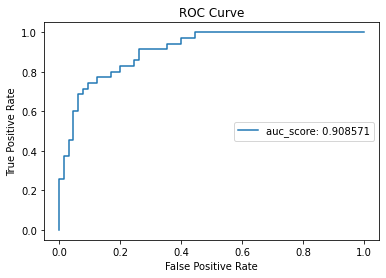

In [44]:
def draw_roc(actual,pred):
    fpr,tpr,threshold=metrics.roc_curve(actual,pred,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,pred)
    plt.plot(fpr,tpr,label='auc_score: %f' %auc_score)
    plt.legend(loc='center right')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
draw_roc(y_test,predictions)

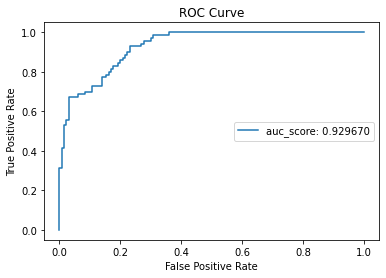

In [45]:
def draw_roc(actual,pred):
    fpr,tpr,threshold=metrics.roc_curve(actual,pred,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,pred)
    plt.plot(fpr,tpr,label='auc_score: %f' %auc_score)
    plt.legend(loc='center right')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
draw_roc(y_train,predictions_train)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
y_test_pred=[]
for x in predictions:
    if x>=0.1:
        y_test_pred.append(1)
    elif x<0.1:
        y_test_pred.append(0)
y_test_pred

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1]

In [48]:
conf_mat=confusion_matrix(y_test,y_test_pred)
conf_mat

array([[39, 26],
       [ 1, 34]], dtype=int64)

In [49]:
accuracy=(conf_mat[0,0]+conf_mat[1,1])/sum(sum(conf_mat))
print('accuracy= %f'%accuracy)

sensitivity=conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
print('sensitivity= %f'%sensitivity)

specificity=conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
print('specificity= %f'%specificity)

accuracy= 0.730000
sensitivity= 0.971429
specificity= 0.600000


In [50]:
table=pd.DataFrame()

In [51]:
table['y_train_pred']=y_train_pred
table

,y_train_pred
0,0.006122
1,0.053689
2,0.834171
3,0.000680
4,0.031213
...,...
195,0.152327
196,0.467897
197,0.009638
198,0.202396


In [52]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for y in num:
    table[y]=table['y_train_pred'].apply(lambda x:1 if x>y else 0)
table 

,y_train_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,0.006122,1,0,0,0,0,0,0,0,0,0,0
1,0.053689,1,0,0,0,0,0,0,0,0,0,0
2,0.834171,1,1,1,1,1,1,1,1,1,0,0
3,0.000680,1,0,0,0,0,0,0,0,0,0,0
4,0.031213,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.152327,1,1,0,0,0,0,0,0,0,0,0
196,0.467897,1,1,1,1,1,0,0,0,0,0,0
197,0.009638,1,0,0,0,0,0,0,0,0,0,0
198,0.202396,1,1,1,0,0,0,0,0,0,0,0


In [53]:
table['y_train']=list(y_train)

In [54]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
metric_table=pd.DataFrame(columns=['Threshold','accuracy','sensitivity','specificity'])
for x in num:
    conf_mat=metrics.confusion_matrix(table.y_train,table[x])
    accuracy=(conf_mat[0,0]+conf_mat[1,1])/sum(sum(conf_mat))
    
    sensitivity=conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    
    specificity=conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])

    metric_table.loc[x]=[x,accuracy,sensitivity,specificity]
metric_table

,Threshold,accuracy,sensitivity,specificity
0.0,0.0,0.350,1.000000,0.000000
0.1,0.1,0.750,1.000000,0.615385
0.2,0.2,0.795,0.957143,0.707692
0.3,0.3,0.820,0.885714,0.784615
0.4,0.4,0.820,0.800000,0.830769
0.5,0.5,0.815,0.728571,0.861538
0.6,0.6,0.840,0.685714,0.923077
0.7,0.7,0.860,0.671429,0.961538
0.8,0.8,0.825,0.528571,0.984615
0.9,0.9,0.785,0.400000,0.992308


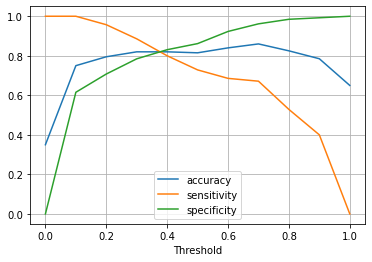

In [55]:
# Plot to find optimal cutoff
metric_table.plot.line(x='Threshold',y=['accuracy','sensitivity','specificity'])
plt.grid()
plt.show() 

In [56]:
y_test_pred=[]
for x in predictions:
    if x>=0.1:
        y_test_pred.append(1)
    elif x<0.1:
        y_test_pred.append(0)
y_test_pred

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1]

In [57]:
x=0.5

In [58]:
[1 if float(model_failure.predict(pd.DataFrame([0.03,0.01,0.05,0.03,0.05]).T))>=0.2 else 0][0]

1

In [59]:
def mass(core_thk):
    density_carbon_fiber=1750

    area_A=48.62
    thk_A=0.0003*8

    area_SL=17.45
    thk_SL=0.0003*4

    area_SC=30.86
    thk_SC=0.0003*4

    area_C=44.45
    thk_C=0.0003*60

    area_SR=13.40
    thk_SR=0.0003*4

    area_D=44.17+43.79
    thk_D=0.0003*8

    # Vol= area * thickness
    # Total Carbon_fiber_vol:
    Vol_total_cf=(area_A*thk_A)+(area_SL*thk_SL)+(area_SC*thk_SC)+(area_C*thk_C)+(area_SR*thk_SR)+(area_D*thk_D)

    mass_cf= density_carbon_fiber * Vol_total_cf
    #print(f'Total mass of carbon fiber: {mass_cf}')

    #***************************************************************************************************************
    density_core=140    #Balsa wood

    #core_thk=[A1,A2,A3,A4,A5,S1,S2,S3,S4,S5,D1,D2,D3,D4,D5]
    #core_thk=[0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.03,0.03,0.03,0.03,0.03]

    area_A1,area_A2,area_A3,area_A4,area_A5=5.21,7.50,9.83,12.73,13.36
    A1,A2,A3,A4,A5=core_thk[0],core_thk[1],core_thk[2],core_thk[3],core_thk[4]

    Vol_A=(area_A1*A1)+(area_A2*A2)+(area_A3*A3)+(area_A4*A4)+(area_A5*A5)

    area_SL1,area_SL2,area_SL3,area_SL4,area_SL5=1.34,2.30,3.01,5.26,5.54
    S1,S2,S3,S4,S5=core_thk[0],core_thk[1],core_thk[2],core_thk[3],core_thk[4]
    Vol_SL=(area_SL1*S1)+(area_SL2*S2)+(area_SL3*S3)+(area_SL4*S4)+(area_SL5*S5)

    area_SR1,area_SR2,area_SR3,area_SR4,area_SR5=1.14,1.74,2.29,4.04,4.19
    S1,S2,S3,S4,S5=core_thk[0],core_thk[1],core_thk[2],core_thk[3],core_thk[4]
    Vol_SR=(area_SR1*S1)+(area_SR2*S2)+(area_SR3*S3)+(area_SR4*S4)+(area_SR5*S5)

    area_D1,area_D2,area_D3,area_D4,area_D5=9.45,13.37,17.93,23.14,24.08
    D1,D2,D3,D4,D5=core_thk[0],core_thk[1],core_thk[2],core_thk[3],core_thk[4]

    Vol_D=(area_D1*D1)+(area_D2*D2)+(area_D3*D3)+(area_D4*D4)+(area_D5*D5)

    Vol_total_core=Vol_A+Vol_SL+Vol_SR+Vol_D

    mass_core= density_core * Vol_total_core
    #print(f'Total mass of core: {mass_core}')

    Total_blade_mass=mass_cf+mass_core
    #print(f'Total mass of blade: {Total_blade_mass}')
    return Total_blade_mass

In [60]:
%matplotlib notebook

<IPython.core.display.Javascript object>


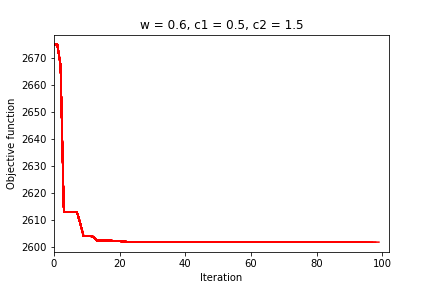

RESULT:
Optimal Solution: [0.01, 0.01, 0.01, 0.014763587620702038, 0.045399194583626686]
Objective function value: 2601.7251765871497


In [95]:
import random
import time
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
def objective_function(O):
    if [1 if float(model_failure.predict(pd.DataFrame(O).T))>=0.2 else 0][0] == 1:
        penalty1 = 2000
    else:
        penalty1 = 0
  
    if float(model_max_def.predict(pd.DataFrame(list(O)).T)) >= 9.5:
        penalty2 = 2000
    else:
        penalty2 = 0
  
    z = mass(O) + penalty1 + penalty2
    return z
  
bounds = [(0.01,0.05),(0.01,0.05),(0.01,0.05),(0.01,0.05),(0.01,0.05)]  # upper and lower bounds of variables
nv = 5  # number of variables
mm = -1  # if minimization problem, mm = -1; if maximization problem, mm = 1
  
# PARAMETERS OF PSO
particle_size = 1000  # number of particles
iterations = 100  # max number of iterations
w = 0.6  # inertia constant
c1 = 0.5  # cognative constant
c2 = 1.5  # social constant

# Visualization
fig = plt.figure()
ax = fig.add_subplot()
fig.show()
plt.title(f'w = {w}, c1 = {c1}, c2 = {c2}')
plt.xlabel("Iteration")
plt.ylabel("Objective function")
# ------------------------------------------------------------------------------
class Particle:
    def __init__(self, bounds):
        self.particle_position = []  # particle position
        self.particle_velocity = []  # particle velocity
        self.local_best_particle_position = []  # best position of the particle
        self.fitness_local_best_particle_position = initial_fitness
        self.fitness_particle_position = initial_fitness
        
        for i in range(nv):
            self.particle_position.append(random.uniform(bounds[i][0],bounds[i][1])) # generate random intial position
            self.particle_velocity.append(random.uniform(-1,1)) # generate random initial velocity
  
    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                    self.local_best_particle_position = self.particle_position  # update the local best
                    self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                    self.local_best_particle_position = self.particle_position  # update the local best
                    self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
  
    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()
  
            cognitive_velocity = c1 * r1 * (self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2 * r2 * (global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w * self.particle_velocity[i] + cognitive_velocity + social_velocity
  
    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]
  
            # check and repair to satisfy the upper bounds
            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]
  
class PSO:
    def __init__(self, objective_function, bounds, particle_size, iterations):
        fitness_global_best_particle_position = initial_fitness
        global_best_particle_position = []
        swarm_particle = []
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
        
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
                
                if mm == -1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm == 1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
            
            A.append(fitness_global_best_particle_position) # record the best fitness
            # Visualization
            ax.plot(A, color='r')
            fig.canvas.draw()
            ax.set_xlim(left=max(0, i - iterations), right=i+3)
            time.sleep(0.01)
        print('RESULT:')
        print('Optimal Solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)

# --------------------------------------
if mm == -1:
    initial_fitness = float('inf') # for minimization problem
if mm == 1:
    initial_fitness = -float('inf') # for maximization problem
#----------------------------------------
# Main PSO
PSO(objective_function, bounds, particle_size, iterations)
plt.show()